In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.preprocessing import image as img

In [2]:
#Splitting the Data 



train = idg(rescale = 1/255)
test = idg(rescale = 1/255)

train_dataset = train.flow_from_directory("C:/Users/suraj/Downloads/Fire Project/2/fire-or-nofire/",
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode ="binary")
test_dataset = test.flow_from_directory("C:/Users/suraj/Downloads/Fire Project/2/fire-or-nofire/", 
                                       target_size = (150,150),
                                          batch_size = 32,
                                          class_mode ="binary")

Found 868 images belonging to 2 classes.
Found 868 images belonging to 2 classes.


In [3]:
print("Numerical Representatinon for Fire and No-Fire : ")
print(train_dataset.class_indices)


Numerical Representatinon for Fire and No-Fire : 
{'Fire': 0, 'No-Fire': 1}


In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))


In [5]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [6]:
#Fitting the model
result=model.fit(train_dataset, epochs = 7, validation_data= test_dataset)

Epoch 1/7
28/28 [==============================] - 84s 3s/step - loss: 0.6023 - accuracy: 0.6751 - val_loss: 0.5403 - val_accuracy: 0.6947
Epoch 2/7
28/28 [==============================] - 84s 3s/step - loss: 0.5663 - accuracy: 0.7189 - val_loss: 0.5286 - val_accuracy: 0.7684
Epoch 3/7
28/28 [==============================] - 37s 1s/step - loss: 0.4749 - accuracy: 0.7650 - val_loss: 0.4846 - val_accuracy: 0.7419
Epoch 4/7
28/28 [==============================] - 35s 1s/step - loss: 0.4299 - accuracy: 0.7926 - val_loss: 0.3954 - val_accuracy: 0.8456
Epoch 5/7
28/28 [==============================] - 35s 1s/step - loss: 0.3932 - accuracy: 0.8445 - val_loss: 0.3667 - val_accuracy: 0.8422
Epoch 6/7
28/28 [==============================] - 35s 1s/step - loss: 0.3833 - accuracy: 0.8295 - val_loss: 0.3524 - val_accuracy: 0.8560
Epoch 7/7
28/28 [==============================] - 35s 1s/step - loss: 0.3297 - accuracy: 0.8606 - val_loss: 0.3884 - val_accuracy: 0.7926


In [7]:
#prediction
import pickle
    
filename = "fire_model.joblib"

pickle.dump(model, open(filename, 'wb'))


pred=model.predict(test_dataset)
pred=np.round(pred)

INFO:tensorflow:Assets written to: ram://3e3adb01-652d-4bc5-bd56-0a586a799d42/assets


INFO:tensorflow:Assets written to: ram://3e3adb01-652d-4bc5-bd56-0a586a799d42/assets


28/28 [==============================] - 16s 563ms/step


In [14]:
print(pred)

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [15]:
print(len(pred))

868


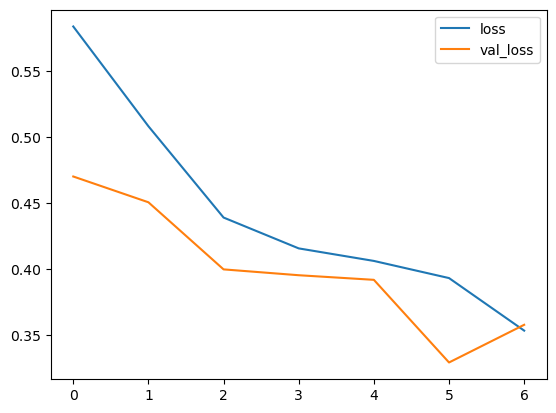

In [16]:
#plotting losses
plt.plot(result.history["loss"],label="loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.legend()

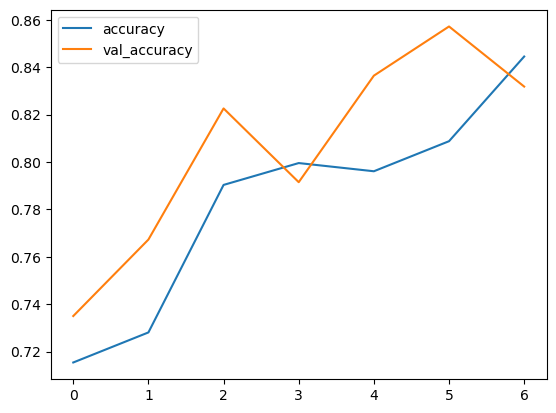

In [17]:
#plotting accuracy
plt.plot(result.history["accuracy"],label="accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.legend()

In [18]:
# 7 epochs is lookin great for the loss and accuracy. I will train the model again but this time with 7 epochs...
# so lets check the model in a real image:




def fire_check(sample):
    img = image.load_img(sample, target_size=(100,100))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis = 0)
    val = model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("Fire Detected!!", fontsize = 20)
    elif val== 0:
        plt.xlabel("Fire Not Detected!!" , fontsize=20)

1/1 [==============================] - 0s 33ms/step
[[0.]]


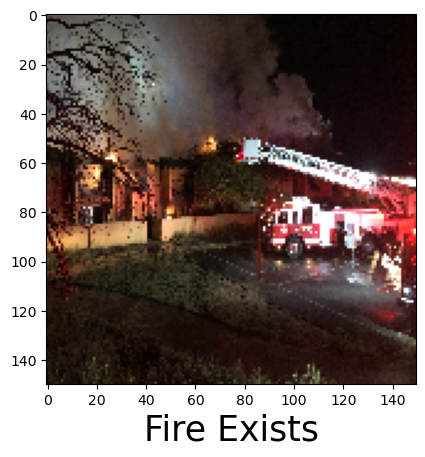

In [21]:
fire_check("C:/Users/suraj/Downloads/Fire Project/2/fire-or-nofire/Fire/484.jpg")

1/1 [==============================] - 0s 48ms/step
[[1.]]


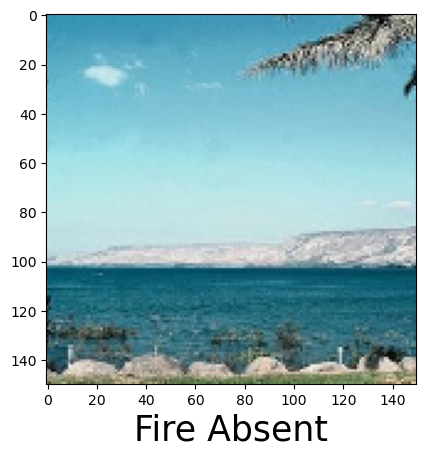

In [22]:
fire_check("C:/Users/suraj/Downloads/Fire Project/2/fire-or-nofire/No-Fire/coast_n708004.jpg")